# Group Challenge
Alba Vilanova Cortezón · Jannis Fröhlking · Jonathan Bahlmann

## STEP 1: Collect Data

### AIS
Dates

* 01.01.2020
* 01.04.2020
* 01.07.2020
* 01.10.2020

In [1]:
# Define regional domain
# Between Rio de Janeiro and Lisboa
# bbox = ((-9, 22), (-46, 38))
# Alba: It does not work: I don't know how to consider west (negative) coordinates! 
# We should figure that out or change it

# Baltic sea
bbox = ((10, 54),(30, 65))

In [2]:
# Download
import requests
import zipfile
import os

# Set file path
urls = ['https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_01_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_04_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_07_01.zip',
'https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2020/AIS_2020_10_01.zip']

"""
for url in urls:
  r = requests.get(url)
  filename = url.split('/')[-1]
  with open(filename,'wb') as output_file:
      output_file.write(r.content)
  # Unzip
  try:
      with zipfile.ZipFile(filename) as z:
          z.extractall()
          print("Extracted all")
          os.remove(filename)
  except:
      print("Invalid file")
print("Download completed!")
"""

'\nfor url in urls:\n  r = requests.get(url)\n  filename = url.split(\'/\')[-1]\n  with open(filename,\'wb\') as output_file:\n      output_file.write(r.content)\n  # Unzip\n  try:\n      with zipfile.ZipFile(filename) as z:\n          z.extractall()\n          print("Extracted all")\n          os.remove(filename)\n  except:\n      print("Invalid file")\nprint("Download completed!")\n'

In [11]:
# Read csv
import pandas as pd
ais_data = pd.DataFrame()
for url in urls:
  filename = url.split('/')[-1]
  filename = filename.replace("zip","csv")
  data = pd.read_csv('data/' + filename)
  ais_data = ais_data.append(data)
print("Before preprocessing...")
ais_data

Before preprocessing...


,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
0,367149340,2020-01-01T00:00:00,29.96476,-90.02724,1.3,10.0,16.0,SYDNEE TAYLOR,NaN,WDD4807,31.0,0.0,26.0,9.0,NaN,31.0,B
1,367687520,2020-01-01T00:00:00,30.20558,-91.03578,10.7,124.9,130.0,CHIPPEWA,NaN,WDI3361,31.0,0.0,22.0,NaN,NaN,NaN,B
2,367368170,2020-01-01T00:00:03,47.53785,-122.32833,0.6,46.5,141.0,SONJA H,NaN,WDE5536,31.0,0.0,18.0,6.0,NaN,32.0,B
3,367007980,2020-01-01T00:00:05,37.95154,-121.32682,0.0,-49.6,511.0,ANGIE M BRUSCO,IMO5111359,WDC3446,31.0,0.0,28.0,7.0,3.4,NaN,B
4,367538940,2020-01-01T00:00:05,30.00258,-93.22608,3.1,168.0,511.0,RITA ANN,NaN,WDG4670,31.0,0.0,21.0,NaN,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7803747,636019842,2020-10-01T23:59:56,29.92496,-89.94634,0.0,-145.2,268.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,A
7803748,338314788,2020-10-01T23:59:57,39.31591,-76.40135,0.1,-49.6,511.0,DREAMTIME III,IMO0000000,NaN,37.0,NaN,12.0,0.0,NaN,NaN,B
7803749,368070720,2020-10-01T23:59:59,30.04614,-90.66375,0.0,-99.2,511.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,B
7803750,368090840,2020-10-01T23:59:59,29.90862,-90.10211,2.9,96.5,179.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A


### CMEMS
Downloading the data for the 4 days (in stage I). [DATASETS](https://resources.marine.copernicus.eu/?option=com_csw&task=results)

In [4]:
import ftplib # import libraries
import os
from getpass import getpass

def make_con(url):
    con = ftplib.FTP(url) # connect to CMEMS FTP
    print(con.getwelcome())
    name = 'avilanovacortez'
    pwd = 'CMEMS-data-2021'
    return con

con = make_con('nrt.cmems-du.eu') # connect to CMEMS FTP

"""
name = getpass('Enter name: ') # get login from input
pwd = getpass('Enter pwd: ')
"""



220 Welcome to CMEMS NRT FTP service


"\nname = getpass('Enter name: ') # get login from input\npwd = getpass('Enter pwd: ')\n"

In [5]:
wav_url = '/Core/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/global-analysis-forecast-wav-001-027/2020/' # url for WAVE products - 3-hourly, one-day-forecast
phy_url = '/Core/GLOBAL_ANALYSIS_FORECAST_PHY_001_024/global-analysis-forecast-phy-001-024/2020/' # url for PHYSICAL products

def print_collection(url, con): # define function for FTP exploration
  try:
    # login
    con.login(name, pwd)
    # navigate to a wave forecast product, this month
    con.cwd(url)
    # retrieve as list
    con.retrlines('LIST') 
    
  except ftplib.all_errors as e:
    print('FTP error:', e)

# print_collection(wav_url + '07', con) # print content of url

new_url = '/Core/GLOBAL_REANALYSIS_PHY_001_030/global-reanalysis-phy-001-030-daily/2019' # only goes til 2019
# print_collection(new_url, make_con('my.cmems-du.eu'))

In [6]:
wav_url = '/Core/GLOBAL_ANALYSIS_FORECAST_WAV_001_027/global-analysis-forecast-wav-001-027/2020/' # url for WAVE products - 3-hourly, one-day-forecast
phy_url = '/Core/GLOBAL_ANALYSIS_FORECAST_PHY_001_024/global-analysis-forecast-phy-001-024/2020/'

wav_jan = "mfwamglocep_2020010100_R20200102.nc"
wav_apr = "mfwamglocep_2020040100_R20200402.nc"
wav_jul = "mfwamglocep_2020070100_R20200702.nc"
wav_oct = "mfwamglocep_2020100100_R20201002.nc"

phy_jan = "mercatorpsy4v3r1_gl12_mean_20200101_R20200115.nc"
phy_apr = "mercatorpsy4v3r1_gl12_mean_20200401_R20200415.nc"
phy_jul = "mercatorpsy4v3r1_gl12_mean_20200701_R20200715.nc"
phy_oct = "mercatorpsy4v3r1_gl12_mean_20201001_R20201014.nc"

def download_ftp(url, prod_name): # function to download CMEMS FTP
  # do check if file exists, taken from source at the top
  if os.path.isfile(prod_name):
    print("There is already a local copy of {}".format(prod_name))
  else:
    try:
      # login as before
      con.login(name, pwd)
      # navigate to desired folder seen above
      con.cwd(url)
      with open(prod_name, 'wb') as fp:
        con.retrbinary('RETR {}'.format(prod_name), fp.write)
            
    except ftplib.all_errors as e:
      print('FTP error:', e)

""" # use this to download data 
download_ftp(wav_url + '01', wav_jan)
download_ftp(wav_url + '04', wav_apr)
download_ftp(wav_url + '07', wav_jul)
download_ftp(wav_url + '10', wav_oct)

download_ftp(phy_url + '01', phy_jan)
download_ftp(phy_url + '04', phy_apr)
download_ftp(phy_url + '07', phy_jul)
download_ftp(phy_url + '10', phy_oct)
"""

" # use this to download data \ndownload_ftp(wav_url + '01', wav_jan)\ndownload_ftp(wav_url + '04', wav_apr)\ndownload_ftp(wav_url + '07', wav_jul)\ndownload_ftp(wav_url + '10', wav_oct)\n\ndownload_ftp(phy_url + '01', phy_jan)\ndownload_ftp(phy_url + '04', phy_apr)\ndownload_ftp(phy_url + '07', phy_jul)\ndownload_ftp(phy_url + '10', phy_oct)\n"

## STEP 3: Merge and preprocess
For CMEMS Data:
* OK Reduce CMEMS data size by using bbox
* Normalize data and remove its outliers

For AIS Data:
* OK Reduce AIS data size by using bbox
* OK Remove ships with Status =! 0 or Status =! 8
* OK Remove ships with SOG < 5 or SOG > 102.2
* OK Remove ships with latitude > 91 and longitude > 181
* OK Remove ships with heading > 361
* WRONG Calculate Gross Tonnage
* Estimate data base times
* Normalize data (SOG) and remove its outliers

In general:
* Merge AIS data with CMEMS data
* Remove unneccessary columns (show only estimated time, latitude, longitude, heading, SOG, COG and gross tonage)

<xarray.Dataset>
Dimensions:    (latitude: 2041, longitude: 4320, time: 8)
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float64 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * time       (time) datetime64[ns] 2020-01-01T03:00:00 ... 2020-01-02
Data variables:
    VHM0       (time, latitude, longitude) float32 ...
    VMDR_WW    (time, latitude, longitude) float32 ...
    VHM0_WW    (time, latitude, longitude) float32 ...
    VMDR_SW1   (time, latitude, longitude) float32 ...
    VTM01_SW1  (time, latitude, longitude) float32 ...
    VMDR_SW2   (time, latitude, longitude) float32 ...
    VTM01_SW2  (time, latitude, longitude) float32 ...
    VMDR       (time, latitude, longitude) float32 ...
    VTM10      (time, latitude, longitude) float32 ...
    VHM0_SW1   (time, latitude, longitude) float32 ...
    VHM0_SW2   (time, latitude, longitude) float32 ...
    VTPK       (time, latitude, longitude) float32 ...
    VSDX       (time, latitude, longitude) float32 ...
    VSDY       (time, latitude, longitude) float32 ...
    VPED       (time, latitude, longitude) float32 ...
    VTM02      (time, latitude, longitude) float32 ...
    VTM01_WW   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:                   CF-1.6
    time_coverage_start:           20200101-03:00:00
    time_coverage_end:             20200102-00:00:00
    date_created:                  20200102-06:22:00
    product_type:                  hindcast
    product:                       GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    product_ref_date:              20200101-00:00:00
    product_range:                 D-1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:   http://marine.copernicus.eu/documents/QUI...
    dataset:                       global-analysis-forecast-wav-001-027
    title:                         Mean fields from global wave model MFWAM o...
    institution:                   METEO-FRANCE
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    area:                          GLO
    geospatial_lon_min:            -180.0
    geospatial_lon_max:            179.9167
    geospatial_lon_step:           0.08332825
    geospatial_lon_units:          degree
    geospatial_lat_min:            -80.0
    geospatial_lat_max:            90.0
    geospatial_lat_step:           0.08333588
    geospatial_lat_units:          degree

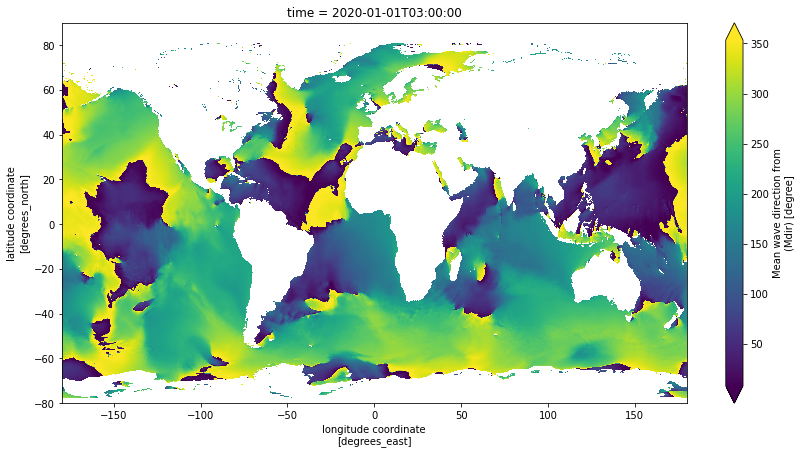

In [7]:
import xarray as xr
import numpy as np

def get_closest(array, value):
    return np.abs(array - value).argmin()

ds_wav_jan = xr.open_dataset('data/' + wav_jan)

ds_wav_jan.VMDR.isel(time=0).plot(robust=True, aspect=2, size=7); # wave direction
ds_wav_jan

In [8]:
import xarray as xr
import numpy as np

def get_closest(array, value):
    return np.abs(array - value).argmin()

ds_wav_jan = xr.open_dataset('data/' + wav_jan)
ds_wav_apr = xr.open_dataset('data/' + wav_apr)
ds_wav_jul = xr.open_dataset('data/' + wav_jul)
ds_wav_oct = xr.open_dataset('data/' + wav_oct)

# ds_wav_all = [ds_wav_jan, ds_wav_apr, ds_wav_jul]
ds_wav_all = [ds_wav_jan, ds_wav_apr, ds_wav_jul, ds_wav_oct]
datasets_wav = []

for ds_month in ds_wav_all:
  
  lon_min = get_closest(ds_month.longitude.data, bbox[0][0])
  lon_max = get_closest(ds_month.longitude.data, bbox[1][0])
  lat_min = get_closest(ds_month.latitude.data, bbox[0][1])
  lat_max = get_closest(ds_month.latitude.data, bbox[1][1])

  ds_wav_month_reg = ds_month.isel(time = 0).sel(longitude = slice(lon_min, lon_max), latitude = slice(lat_min, lat_max))
  datasets_wav.append(ds_wav_month_reg)

ds_wav = xr.concat(datasets_wav, dim = 'ds_month')
ds_wav

<xarray.Dataset>
Dimensions:    (ds_month: 4, latitude: 0, longitude: 0)
Coordinates:
  * longitude  (longitude) float64 
  * latitude   (latitude) float64 
    time       (ds_month) datetime64[ns] 2020-01-01T03:00:00 ... 2020-10-01T0...
Dimensions without coordinates: ds_month
Data variables:
    VHM0       (ds_month, latitude, longitude) float32 
    VMDR_WW    (ds_month, latitude, longitude) float32 
    VHM0_WW    (ds_month, latitude, longitude) float32 
    VMDR_SW1   (ds_month, latitude, longitude) float32 
    VTM01_SW1  (ds_month, latitude, longitude) float32 
    VMDR_SW2   (ds_month, latitude, longitude) float32 
    VTM01_SW2  (ds_month, latitude, longitude) float32 
    VMDR       (ds_month, latitude, longitude) float32 
    VTM10      (ds_month, latitude, longitude) float32 
    VHM0_SW1   (ds_month, latitude, longitude) float32 
    VHM0_SW2   (ds_month, latitude, longitude) float32 
    VTPK       (ds_month, latitude, longitude) float32 
    VSDX       (ds_month, latitude, longitude) float32 
    VSDY       (ds_month, latitude, longitude) float32 
    VPED       (ds_month, latitude, longitude) float32 
    VTM02      (ds_month, latitude, longitude) float32 
    VTM01_WW   (ds_month, latitude, longitude) float32 
Attributes:
    Conventions:                   CF-1.6
    time_coverage_start:           20200101-03:00:00
    time_coverage_end:             20200102-00:00:00
    date_created:                  20200102-06:22:00
    product_type:                  hindcast
    product:                       GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    product_ref_date:              20200101-00:00:00
    product_range:                 D-1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:   http://marine.copernicus.eu/documents/QUI...
    dataset:                       global-analysis-forecast-wav-001-027
    title:                         Mean fields from global wave model MFWAM o...
    institution:                   METEO-FRANCE
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    area:                          GLO
    geospatial_lon_min:            -180.0
    geospatial_lon_max:            179.9167
    geospatial_lon_step:           0.08332825
    geospatial_lon_units:          degree
    geospatial_lat_min:            -80.0
    geospatial_lat_max:            90.0
    geospatial_lat_step:           0.08333588
    geospatial_lat_units:          degree

In [9]:
ds_phy_jan = xr.open_dataset('data/' + phy_jan)
ds_phy_apr = xr.open_dataset('data/' + phy_apr)
ds_phy_jul = xr.open_dataset('data/' + phy_jul)
ds_phy_oct = xr.open_dataset('data/' + phy_oct)

# ds_phy_all = [ds_phy_jan, ds_phy_apr, ds_phy_jul]
ds_phy_all = [ds_phy_jan, ds_phy_apr, ds_phy_jul, ds_phy_oct]
datasets_phy = []

for ds_month in ds_phy_all:
  
  lon_min = get_closest(ds_month.longitude.data, bbox[0][0])
  lon_max = get_closest(ds_month.longitude.data, bbox[1][0])
  lat_min = get_closest(ds_month.latitude.data, bbox[0][1])
  lat_max = get_closest(ds_month.latitude.data, bbox[1][1])

  ds_phy_month_reg = ds_month.isel(time = 0).sel(longitude = slice(lon_min, lon_max), latitude = slice(lat_min, lat_max))
  datasets_phy.append(ds_phy_month_reg)

ds_phy = xr.concat(datasets_phy, dim = 'ds_month')
ds_phy

<xarray.Dataset>
Dimensions:    (depth: 50, ds_month: 4, latitude: 0, longitude: 0)
Coordinates:
  * longitude  (longitude) float32 
  * latitude   (latitude) float32 
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
    time       (ds_month) datetime64[ns] 2020-01-01T12:00:00 ... 2020-10-01T1...
Dimensions without coordinates: ds_month
Data variables:
    mlotst     (ds_month, latitude, longitude) float32 
    zos        (ds_month, latitude, longitude) float32 
    bottomT    (ds_month, latitude, longitude) float32 
    sithick    (ds_month, latitude, longitude) float32 
    siconc     (ds_month, latitude, longitude) float32 
    usi        (ds_month, latitude, longitude) float32 
    vsi        (ds_month, latitude, longitude) float32 
    thetao     (ds_month, depth, latitude, longitude) float32 
    so         (ds_month, depth, latitude, longitude) float32 
    uo         (ds_month, depth, latitude, longitude) float32 
    vo         (ds_month, depth, latitude, longitude) float32 
Attributes:
    title:              daily mean fields from Global Ocean Physics Analysis ...
    easting:            longitude
    northing:           latitude
    history:            2020/01/12 21:22:06 MERCATOR OCEAN Netcdf creation
    source:             MERCATOR PSY4V3R1
    institution:        MERCATOR OCEAN
    references:         http://www.mercator-ocean.fr
    comment:            CMEMS product
    Conventions:        CF-1.4
    domain_name:        GL12
    field_type:         mean
    field_date:         2020-01-01 00:00:00
    field_julian_date:  25567.0
    julian_day_unit:    days since 1950-01-01 00:00:00
    forecast_range:     0-day_forecast
    forecast_type:      hindcast
    bulletin_date:      2020-01-15 00:00:00
    bulletin_type:      operational
    longitude_min:      -180.0
    longitude_max:      179.91667
    latitude_min:       -80.0
    latitude_max:       90.0
    z_min:              0.494025
    z_max:              5727.917

In [14]:
# Remove ships considering region
ais_data = ais_data[(ais_data['LON'] > bbox[0][0]) & (ais_data['LON'] < bbox[1][0])].dropna()
ais_data = ais_data[(ais_data['LAT'] > bbox[0][1]) & (ais_data['LAT'] < bbox[1][1])].dropna()

# Remove ships with status =! 0 and status =! 8
ais_data = ais_data[(ais_data['Status'] == 0) | (ais_data['Status'] == 8)].dropna()

# Remove ships with SOG < 5 or SOG > 102.2
ais_data = ais_data[(ais_data['SOG'] > 5) & (ais_data['SOG'] < 102.2)].dropna()

# Remove ships with heading > 361
ais_data = ais_data[(ais_data['Heading'] < 361)].dropna()

# Calculate tonnage (Length * Breadth * Depth * S) - WE DON'T HAVE THE DEPTH
# According to https://cdn.shopify.com/s/files/1/1021/8837/files/Tonnage_Guide_1_-_Simplified_Measurement.pdf?1513
ais_data['GrossTonnage'] = 0.67 * ais_data['Length'] * ais_data['Width']

ais_data = ais_data.reset_index(drop=True)

ais_data

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass,GrossTonnage


In [11]:
# Merge AIS and CMEMS data

study_data = ais_data

study_data['VHM0'] = 0.0
study_data['VMDR'] = 0.0
study_data['Temperature'] = 0.0
study_data['Salinity'] = 0.0

def extract_to_ais():
  for index, row in study_data.iterrows():

      lat = round(row['LAT'], 1)
      lon = round(row['LON'], 1)
      time = str(row['BaseDateTime'])

      VHM0 = ds_wav.VHM0.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
      VMDR = ds_wav.VMDR.sel(time = time, longitude = lon, latitude = lat, method = 'nearest')
      
      thetao = ds_phy.thetao.sel(longitude = lon, latitude = lat, method = 'nearest').isel(depth = 0)
      salin = ds_phy.so.sel(longitude = lon, latitude = lat, method = 'nearest').isel(depth = 0)

      study_data.at[index, 'VHM0'] = VHM0
      study_data.at[index, 'VMDR'] = VMDR
      study_data.at[index, 'Temperature'] = thetao
      study_data.at[index, 'Salinity'] = salin
      
extract_to_ais()

study_data

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,Length,Width,Draft,Cargo,TranscieverClass,GrossTonnage,VHM0,VMDR,Temperature,Salinity


#Notes from meetings

**02 - 06 - 2021**

Space time cubes
- 52N: sfTracks space time cube

simple solution:
- least cost path as in simple_routing.ipynb

- start simple

**09 - 06 - 2021**

easy retrieval for cmems data: harvester.maridata EnvDataAPI github

regarding modelling:
- filter for ship types
- select a few specific ship
- 2000 records is too small
- have specific lengths and widths of ships
- Exclude Speed over ground below 7 knots
- standardization & normalization is recommended

regarding routing:
- Example Group C: Genetic algorithm
- multi-objective optimization: pymoo - NSGA-II